In [39]:
# Import data from excel file. One of the column is name of the process run. User can select data from one process run. 
# Program will save minimum, maximum and average values of all parameters during selected run from table to the new csv file. 
import pandas as pd
import csv
data = pd.read_excel("Data_Excel.xlsx", sheet_name=0).set_index("Date")
col_names = pd.DataFrame(data).columns
run_names = data["Run name"].dropna().unique()
empty_row = []

choice_run = input(f"Please, choice run name: {run_names}")
report = data[data["Run name"] == choice_run]
parameters = col_names[2:]
min_values = [round(report[name].min(), 1) for name in parameters]
avg_values = [round(report[name].mean(), 1) for name in parameters]
max_values = [round(report[name].max(), 1) for name in parameters]
columns = ["min", "avg", "max"]
row_0 = ["Parameter"]
row_1 = [columns[0]]
row_2 = [columns[1]]
row_3 = [columns[2]]
for i in parameters:
    row_0.append(i)
for i in min_values:
    row_1.append(i)
for i in avg_values:
    row_2.append(i)
for i in max_values:
    row_3.append(i)
csv_file = open("new_data_csv.csv", mode="w", newline="")
writer = csv.writer(csv_file, delimiter=";")
writer.writerow([choice_run])
writer.writerow(empty_row)
writer.writerow(row_0)
writer.writerow(row_1)
writer.writerow(row_2)
writer.writerow(row_3)
writer.writerow(empty_row)
csv_file.close()

columns = ["max"]
df = pd.DataFrame(max_values, columns = columns).set_index(parameters)
print(df)

columns = ["min"]
df = pd.DataFrame(min_values, columns = columns).set_index(parameters)
print(df)

columns = ["avg"]
df = pd.DataFrame(avg_values, columns = columns).set_index(parameters)
print(df)

          max
Par_1    90.0
Par_2   160.9
Par_3   244.0
Par_4   269.0
Par_5   448.0
Par_6  1948.0
Par_7   382.0
         min
Par_1   66.0
Par_2  135.2
Par_3  211.1
Par_4  229.2
Par_5  416.8
Par_6  700.0
Par_7  182.0
          avg
Par_1    77.9
Par_2   151.5
Par_3   233.6
Par_4   260.5
Par_5   440.1
Par_6  1434.6
Par_7   314.8


In [8]:
# You can choose day and program will show data from that day.
chosen_day = input("Select date (in format: RRRR-MM-DD)")
data_day = data.loc[chosen_day]
print(data_day)

Run name    Winter 2023-2024
DOS                     33.0
Par_1                  80.11
Par_2                 160.13
Par_3                 242.81
Par_4                 260.54
Par_5                 431.01
Par_6                 1457.0
Par_7                  189.0
Name: 2024-01-01 00:00:00, dtype: object


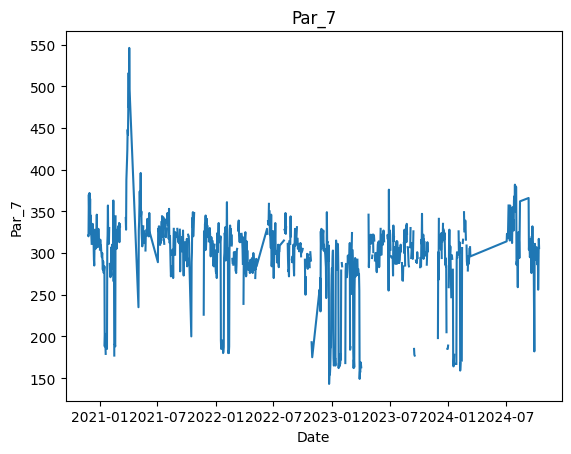

In [13]:
# Making graph of selected parameter.
import matplotlib.pyplot as plt
numbered_p = [par for par in enumerate(parameters, start = 1)]
choice_parameter = int(input(f"Select one parameter (number of parameter): {numbered_p}"))
plt.plot(data[parameters[choice_parameter-1]], label = parameters[choice_parameter-1])
plt.title(parameters[choice_parameter-1])
plt.xlabel("Date")
plt.ylabel(parameters[choice_parameter-1])
plt.show()


In [14]:
# Enumerate
for p in enumerate(parameters, start = 1):
    print(p)

(1, 'Par_1')
(2, 'Par_2')
(3, 'Par_3')
(4, 'Par_4')
(5, 'Par_5')
(6, 'Par_6')
(7, 'Par_7')


In [15]:
# Enumerate
numbered_p_3 = [p for p in enumerate(parameters, start = 1)]
print(numbered_p_3)

[(1, 'Par_1'), (2, 'Par_2'), (3, 'Par_3'), (4, 'Par_4'), (5, 'Par_5'), (6, 'Par_6'), (7, 'Par_7')]


In [16]:
# Data from selected row.
print(data.iloc[0])

Run name    Winter 2020-2021
DOS                        1
Par_1                  73.64
Par_2                 146.04
Par_3                 228.59
Par_4                 252.15
Par_5                 445.94
Par_6                 1106.0
Par_7                  321.0
Name: 2020-11-26 00:00:00, dtype: object


In [17]:
# Data without rows with null values.
print(data.dropna())

                    Run name  DOS  Par_1   Par_2   Par_3   Par_4   Par_5  \
Date                                                                       
2020-11-26  Winter 2020-2021    1  73.64  146.04  228.59  252.15  445.94   
2020-11-27  Winter 2020-2021    2  80.14  146.45  229.37  259.23  449.64   
2020-11-28  Winter 2020-2021    3  80.16  148.04  229.37  259.23  449.08   
2020-11-29  Winter 2020-2021    4  80.21  150.74  231.94  263.45  448.02   
2020-11-30  Winter 2020-2021    5  80.21  152.06  232.37  264.24  447.62   
...                      ...  ...    ...     ...     ...     ...     ...   
2024-10-09       Summer 2024   99  83.29  149.79  231.38  259.74  443.60   
2024-10-10       Summer 2024  100  89.89  149.79  230.93  263.37  446.12   
2024-10-11       Summer 2024  101  89.95  149.79  230.79  263.37  447.33   
2024-10-12       Summer 2024  102  89.96  149.79  230.95  263.37  447.98   
2024-10-13       Summer 2024  103  89.91  149.79  230.95  263.37  447.99   

           

In [34]:
# Using of function groupby - method size for showing counts of rows in each run. 
run_stats = data.groupby("Run name")
run_stats.size()

Run name
Summer 2021         154
Summer 2022         131
Summer 2023         189
Summer 2024          77
Winter 2020-2021    131
Winter 2021-2022    167
Winter 2022-2023    133
Winter 2023-2024    103
dtype: int64

In [35]:
# Maximum values of Par_1 in each run.
run_stats["Par_1"].max()

Run name
Summer 2021         80.34
Summer 2022         98.18
Summer 2023         93.68
Summer 2024         89.96
Winter 2020-2021    80.38
Winter 2021-2022    90.16
Winter 2022-2023    97.87
Winter 2023-2024    80.12
Name: Par_1, dtype: float64

In [20]:
# Minimum values of Par_2 in each run.
run_stats["Par_2"].min()

Run name
Summer 2021         145.53
Summer 2022         146.60
Summer 2023         139.29
Summer 2024         135.17
Winter 2020-2021    146.04
Winter 2021-2022    144.24
Winter 2022-2023    146.09
Winter 2023-2024    145.97
Name: Par_2, dtype: float64

In [21]:
# Average values of Par_1 in each run.
round(run_stats["Par_3"].mean(), 2)

Run name
Summer 2021         236.53
Summer 2022         236.62
Summer 2023         237.16
Summer 2024         233.57
Winter 2020-2021    237.87
Winter 2021-2022    234.72
Winter 2022-2023    236.93
Winter 2023-2024    235.69
Name: Par_3, dtype: float64

In [22]:
# Average values of Par_4 in each run. Saving values to csv and excel. 
avg_par_4 = (round(run_stats["Par_4"].mean(), 2))
print(avg_par_4)
for i in avg_par_4:
    print(i)

with pd.ExcelWriter("new_data_excel_python.xlsx") as excel_file:
    (round(run_stats["Par_4"].mean(), 2)).to_excel(excel_file)

avg_par_4.to_csv("new_data_2_csv.csv")

Run name
Summer 2021         263.04
Summer 2022         270.81
Summer 2023         270.44
Summer 2024         260.50
Winter 2020-2021    260.72
Winter 2021-2022    266.41
Winter 2022-2023    275.01
Winter 2023-2024    257.51
Name: Par_4, dtype: float64
263.04
270.81
270.44
260.5
260.72
266.41
275.01
257.51


In [36]:
# Average values of Par_5 in each run. Saving values to csv file. 
import csv
csv_file = open("new_data_3_csv.csv", mode="w")
writer = csv.writer(csv_file, delimiter=";")
writer.writerow(round(run_stats["Par_5"].mean(), 2))
csv_file.close()

In [24]:
print(run_stats)

In [25]:
# Showing data in Summer 2024 without rows with null values. 
run_stats.get_group("Summer 2024").dropna()

,Run name,DOS,Par_1,Par_2,Par_3,Par_4,Par_5,Par_6,Par_7
Date,,,,,,,,,
2024-07-03,Summer 2024,1,65.98,135.17,211.08,229.16,445.84,700.0,314.0
2024-07-04,Summer 2024,2,71.95,138.92,217.49,241.40,447.11,781.0,323.0
2024-07-05,Summer 2024,3,72.79,144.41,222.01,246.91,446.48,869.0,320.0
2024-07-07,Summer 2024,5,72.81,152.59,227.86,256.52,446.32,1055.0,318.0
2024-07-08,Summer 2024,6,73.27,151.45,228.11,256.02,445.64,812.0,337.0
...,...,...,...,...,...,...,...,...,...
2024-10-09,Summer 2024,99,83.29,149.79,231.38,259.74,443.60,1194.0,303.0
2024-10-10,Summer 2024,100,89.89,149.79,230.93,263.37,446.12,1249.0,256.0
2024-10-11,Summer 2024,101,89.95,149.79,230.79,263.37,447.33,1274.0,280.0


In [26]:
# Showing every data in Summer 2024.
run_stats.get_group("Summer 2024")

,Run name,DOS,Par_1,Par_2,Par_3,Par_4,Par_5,Par_6,Par_7
Date,,,,,,,,,
2024-07-03,Summer 2024,1,65.98,135.17,211.08,229.16,445.84,700.0,314.0
2024-07-04,Summer 2024,2,71.95,138.92,217.49,241.40,447.11,781.0,323.0
2024-07-05,Summer 2024,3,72.79,144.41,222.01,246.91,446.48,869.0,320.0
2024-07-06,Summer 2024,4,75.87,150.71,228.13,256.05,446.99,1001.0,NaN
2024-07-07,Summer 2024,5,72.81,152.59,227.86,256.52,446.32,1055.0,318.0
...,...,...,...,...,...,...,...,...,...
2024-10-09,Summer 2024,99,83.29,149.79,231.38,259.74,443.60,1194.0,303.0
2024-10-10,Summer 2024,100,89.89,149.79,230.93,263.37,446.12,1249.0,256.0
2024-10-11,Summer 2024,101,89.95,149.79,230.79,263.37,447.33,1274.0,280.0


In [40]:
# Showing data where values of Par_6 are more then 1800.
print(data[data["Par_6"] > 1800])

                    Run name  DOS  Par_1   Par_2   Par_3   Par_4   Par_5  \
Date                                                                       
2021-03-14  Winter 2020-2021  109  74.33  156.00  244.89  259.30  439.05   
2021-03-15  Winter 2020-2021  110  74.33  156.00  244.89  259.30  438.97   
2021-03-16  Winter 2020-2021  111  74.32  156.00  244.89  259.30  438.99   
2021-10-03       Summer 2021  130  80.32  152.44  238.81  267.17  447.53   
2022-05-08  Winter 2021-2022  166  80.23  152.13  235.20  268.51  442.99   
...                      ...  ...    ...     ...     ...     ...     ...   
2024-07-31       Summer 2024   29  74.99  157.05  237.94  264.37  436.00   
2024-08-01       Summer 2024   30  74.98  156.98  236.94  265.64  436.01   
2024-08-02       Summer 2024   31  74.97  156.91  237.91  261.37  434.52   
2024-08-13       Summer 2024   42  75.07  160.92  244.00  267.32  435.02   
2024-08-14       Summer 2024   43  71.74  160.59  241.46  263.72  416.78   

           

In [41]:
# Showing data where Par_6 value is the lowest.
print(data[data["Par_6"] == min(data["Par_6"])])

               Run name  DOS  Par_1   Par_2   Par_3   Par_4   Par_5  Par_6  \
Date                                                                         
2024-07-03  Summer 2024    1  65.98  135.17  211.08  229.16  445.84  700.0   

            Par_7  
Date               
2024-07-03  314.0  


In [42]:
# Maximum of Par_6 and minimum of Par_7.
print(max(data["Par_6"]))
print(min(data["Par_7"]))

2244.0
143.0


In [44]:
# Name of columns.
print(col_names[2:])

for i in col_names:
    print(i)

Index(['Par_1', 'Par_2', 'Par_3', 'Par_4', 'Par_5', 'Par_6', 'Par_7'], dtype='object')
Run name
DOS
Par_1
Par_2
Par_3
Par_4
Par_5
Par_6
Par_7
